# Reproducing 'Philips' Comparative Wall Atlas of Africa'

Recreating 'Philips' Comparative Wall Atlas of Africa' (circa 1950s).

<details>
<summary><b>Map</b></summary>

<img src='figures/Wall_Map_target.png' width='500px'>
</details>

**Map Size**

- Real size of map (interior border) in inches is 33.5 (width) by 40.5 (height).
- Jupyter size of map (interior border) in inches **@20%** is 6.7 by 8.1.
- Jupyter size of map (interior border) in inches **@30%** is 10.05 by 12.15.


<details>
<summary><b>Map Features</b></summary>

| **Geographical Features**                           | **Climate Variables**                                                          | **Text Lables**                      |
| :-                                                  | :-                                                                             | :-                                   |
| Labelled gridlines                                  | Total rainfall (inches) over 6 month period (land only)                        | Settlements                          |
| Annotations for Equator and the Tropics             | Pressure isobars (in inches and Millibars) for 6 month period (ocean and land) | Land features (e.g. Deserts/Plateaus)|
| Rivers (sized by thickness corresponding to width)  | Prevailing wind (equal-sized arrows) for 6 month period (ocean and land)       | Ocean features (e.g. Channels/Gulfs) |
| National borders (dashed grey lines)                | Lakes and Rivers                                                               | Colorbar, legend, scale, temporal information   
| Wetlands ???                                    | Inset UK climate figure for reference                    |
</details>




## Step 1: Template

Making a template of 'Geographical Features' using inbuilt Cartopy functions.

**Completed Steps:** 

- [x] Ascertain map projection and axis limits (Cartopy Ocean feature does not work for the LAEA projection).
- [Colors for ocean and land](https://github.com/SciTools/cartopy/issues/803#issuecomment-272286945).
- Include country borders.
- Format tickmarks.
- Add lines for for Tropics.

**Need to:**
- Title and label fonts.
- Weight rivers by width.
- Find higher resolution lakes.

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import geopandas as gpd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
path = 'figures/'
#name1 = 'Template V_Orthographic'
#name2 = 'Template V_Robinson'
#name3 = 'Template V_Mollweide'
name4 = 'Template V_LAEA'
name5 = 'Template T_TransMerc'

proj1 = ccrs.Orthographic(central_longitude = 17)
proj2 = ccrs.Robinson()
proj3 = ccrs.Mollweide()
proj4 = ccrs.LambertAzimuthalEqualArea(central_longitude = 10)
proj5 = ccrs.TransverseMercator(central_longitude = 10)

figsize = (10.05, 12.15)
extent = [-17.75, 51, -32, 42]
xticks = [-20, -10, 0, 10, 20, 30, 40, 50]
yticks = [-30, -20, -10, 0, 10, 20, 30, 40]

cardinal_labels = {"east": "", "west": "", "north": "", "south": ""}
lat_formatter = LatitudeFormatter(degree_symbol = '', cardinal_labels = cardinal_labels)
lon_formatter = LongitudeFormatter(degree_symbol = '', cardinal_labels = cardinal_labels)

cap_lats = [-23.4, -23.4]
can_lats = [23.4, 23.4]
c_lons = [-30, 60]

rivers_50m = cfeat.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')
rivers_10m = cfeat.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')

oceancol = 'blanchedalmond'
landcol = 'gold'
lakecol = 'white'

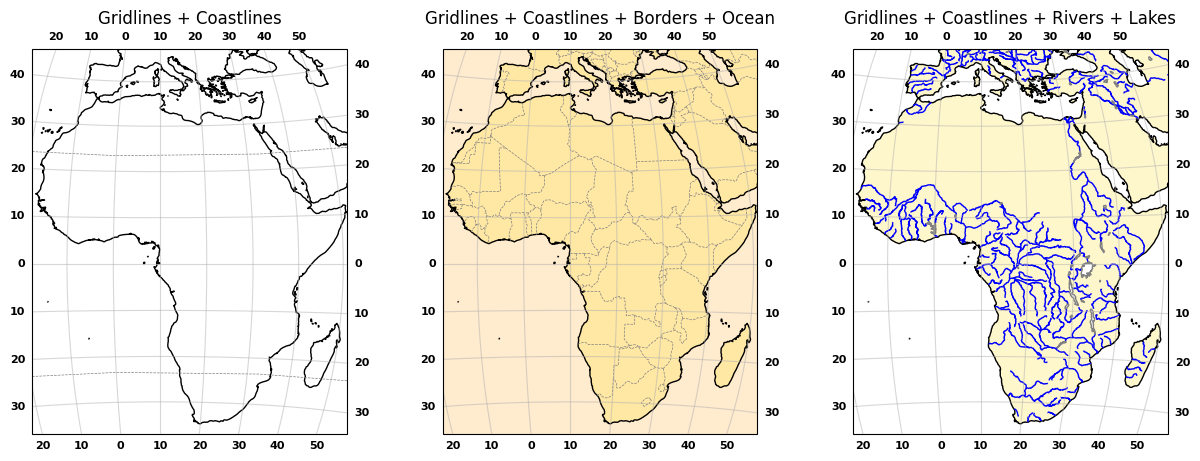

In [3]:
fig, axs = plt.subplots(figsize = (15, 5), ncols = 3, 
                        subplot_kw = {'projection': proj4})

for i, ax in enumerate(fig.axes):
    ax.set_extent(extent)
    gl = ax.gridlines(alpha = 0.5, draw_labels = True, x_inline = False, 
                      yformatter = lat_formatter, xformatter = lon_formatter,
                      ylabel_style = {"size": 8, "weight": "bold"},
                      xlabel_style = {"size": 8, "weight": "bold"})
    gl.xlocator = mticker.FixedLocator(xticks)
    gl.ylocator = mticker.FixedLocator(yticks)
    ax.coastlines(resolution = '50m')

axs[0].set_title('Gridlines + Coastlines') 
axs[0].plot(c_lons, cap_lats, linestyle = '--', transform = ccrs.PlateCarree(), color = 'grey', linewidth = 0.5)
axs[0].plot(c_lons, can_lats, linestyle = '--', transform = ccrs.PlateCarree(), color = 'grey', linewidth = 0.5)

axs[1].set_title('Gridlines + Coastlines + Borders + Ocean') 
axs[1].add_feature(cfeat.BORDERS, linestyle = '--', edgecolor = 'grey', linewidth = 0.5)
axs[1].set_facecolor(oceancol)
axs[1].add_feature(cfeat.LAND, facecolor = landcol, alpha = 0.2)

axs[2].set_title('Gridlines + Coastlines + Rivers + Lakes')
axs[2].add_feature(rivers_10m, facecolor = 'None', edgecolor = 'b', linewidth = 1) 
axs[2].add_feature(cfeat.LAKES.with_scale('50m'), alpha = 1, facecolor = 'white', edgecolor = 'gray', linewidth = 1)
axs[2].add_feature(cfeat.LAND, facecolor = landcol, alpha = 0.2);

### Font Test

Use the Matplotlib font library to manually find a font hat is most suitable for the map title.

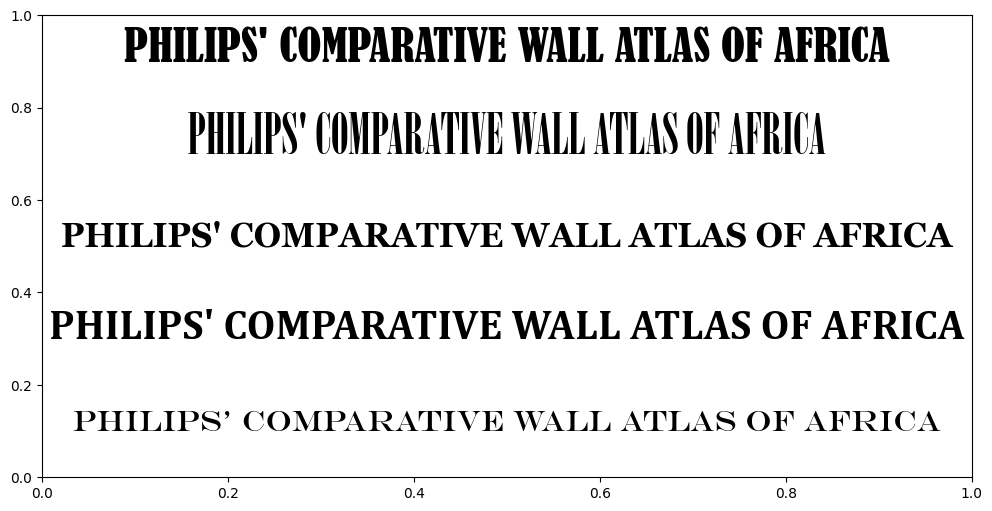

In [24]:
title = "PHILIPS' COMPARATIVE WALL ATLAS OF AFRICA"

font1 = 'Bernard MT Condensed'
font2 = 'Onyx'
font3 = 'Georgia'
font4 = 'Cambria'
font5 = 'Engravers MT'

fig, ax = plt.subplots(figsize = (12, 6))
ax.text(0.5, 0.9, title, ha = 'center', fontname = font1, size = 32)
ax.text(0.5, 0.7, title, ha = 'center', fontname = font2, size = 40, fontweight = 'bold')
ax.text(0.5, 0.5, title, ha = 'center', fontname = font3, size = 24, fontweight = 'bold')
ax.text(0.5, 0.3, title, ha = 'center', fontname = font4, size = 30, fontweight = 'bold')
ax.text(0.5, 0.1, title, ha = 'center', fontname = font5, size = 20, fontweight = 'bold');

And the winner is `'Bernard MT Condensed'`

### Make a template

Define a function which plots a map incorporating the inbuilt cartopy features (map projection, gridlines, country borders, coast lines, title font).

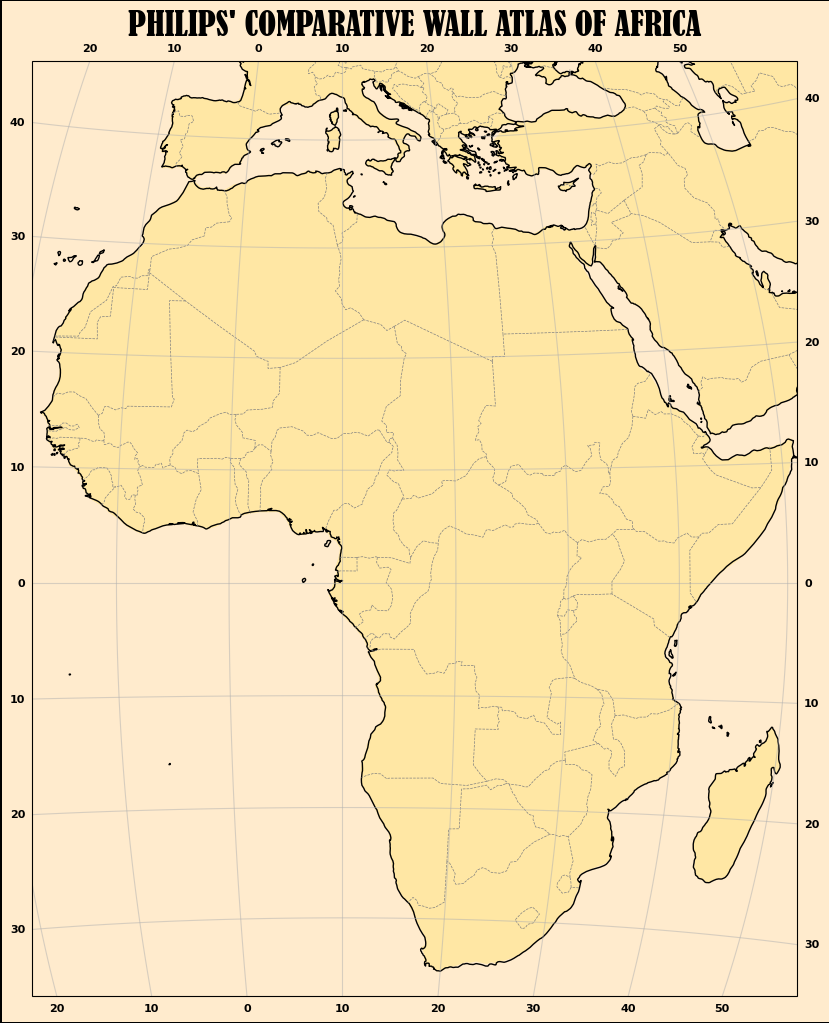

In [28]:
def plot_template(figsize= (10.05, 12.15),
                  proj=ccrs.LambertAzimuthalEqualArea(central_longitude = 10), 
                  name="PHILIPS' COMPARATIVE WALL ATLAS OF AFRICA"):
    fig = plt.figure(figsize=figsize, frameon=True, facecolor=oceancol, linewidth=2.0, edgecolor='black')
    ax = fig.add_subplot(1, 1, 1, projection=proj)
    ax.set_extent(extent)
    gl = ax.gridlines(alpha = 0.5, draw_labels = True, x_inline = False, 
                      yformatter = lat_formatter, xformatter = lon_formatter,
                      ylabel_style = {"size": 8, "weight": "bold"},
                      xlabel_style = {"size": 8, "weight": "bold"})
    gl.xlocator = mticker.FixedLocator(xticks)
    gl.ylocator = mticker.FixedLocator(yticks)
    ax.coastlines(resolution = '50m')
    ax.set_facecolor(oceancol)
    ax.add_feature(cfeat.LAND, facecolor = landcol, alpha = 0.2)
    ax.add_feature(cfeat.BORDERS, linestyle = '--', edgecolor = 'grey', linewidth = 0.5)
    ax.set_title(name, fontname = font1, size = 24, fontweight = 'bold')
    return fig, ax
fig, ax = plot_template()

### River Weighting

Next layer is to add some rivers which include more detail than the inbuilt Cartopy option. For this I used this helpful [Python Maps tutorial](https://towardsdatascience.com/creating-beautiful-river-maps-with-python-37c9b5f5b74c) and data from [Andreadis et al. 2013](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/wrcr.20440).

First step is to load the shapefile data.

In [30]:
africa_rivers = gpd.read_file('data/afrivs.shp')
print('Number of rivers: ' + len(africa_rivers))
africa_rivers.head(5)

,cat,AREA,UP_CELLS,DISCHARGE,WIDTH,WIDTH5,WIDTH95,DEPTH,DEPTH5,DEPTH95,ARCID,geometry
0,1,24.56,142,0.55,5.32,1.94,14.74,0.21,0.10,0.49,1,"LINESTRING (9.80417 37.31250, 9.81042 37.31875..."
1,2,34.98,199,0.79,6.38,2.32,17.81,0.25,0.11,0.57,2,"LINESTRING (9.75833 37.27083, 9.76458 37.26458..."
2,3,97.00,566,2.25,10.80,3.84,30.78,0.37,0.16,0.87,4,"LINESTRING (9.39792 37.21458, 9.40625 37.22292..."
3,4,74.98,111,1.72,9.45,3.38,26.81,0.33,0.15,0.78,5,"LINESTRING (9.41250 37.21667, 9.40625 37.21042..."
4,5,408.69,106,9.91,22.66,7.82,66.56,0.66,0.29,1.58,6,"LINESTRING (9.50208 37.20833, 9.50208 37.20208..."


<Axes: title={'center': 'Width (m)'}, ylabel='Frequency'>

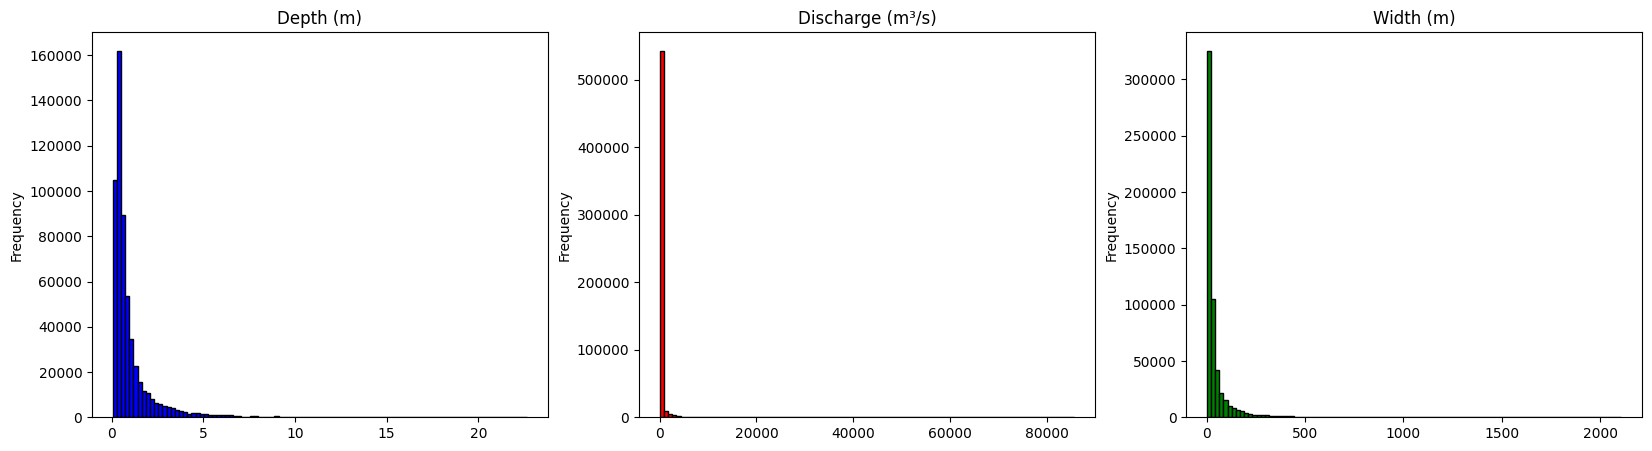

In [41]:
fig, axs = plt.subplots(figsize = (20, 5), ncols = 3)
africa_rivers.DEPTH.plot.hist(ax = axs[0], bins = 100, color = 'b', edgecolor = 'k', title = 'Depth (m)')
africa_rivers.DISCHARGE.plot.hist(ax = axs[1], bins = 100, color = 'r', edgecolor = 'k', title = 'Discharge (m³/s)')
africa_rivers.WIDTH.plot.hist(ax = axs[2], bins = 100, color = 'g', edgecolor = 'k', title = 'Width (m)')

Issues with the data are:
- very large number of river entries (566433).
- very high resolution lines.
- no way to weight the width of the plotted rivers.
 
Using guidance from the Python Maps tutorial we can do the following:
- filter out rivers which are less than a certain width/length.
- add a new column to the datset with a linewidth value to weight the rivers accordingly.
- Output the new data to disk.

In [58]:
def scale_lw(df, column_name, min_value= 0.5, max_value= 3):
    leftSpan = np.amax(df[column_name]) - np.amin(df[column_name])
    rightSpan = 3 - 0.5
    valueScaled = (df[column_name] - np.amin(df[column_name])) / leftSpan
    df[f'LW_{column_name}'] = 0.5 + (valueScaled * rightSpan)
    return df

rivers = africa_rivers.loc[africa_rivers.WIDTH > 100]
rivers_neat = scale_lw(rivers, 'WIDTH', min_value = 0.05, max_value = 2.5)
rivers_neat = scale_lw(rivers, 'DEPTH', min_value = 0.05, max_value = 2.5)
rivers_neat.head()
rivers_neat.to_file('data/afrivs_neat.shp')

c:\Users\danho\miniconda3\envs\wall_map_env\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\danho\miniconda3\envs\wall_map_env\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Text(0.5, 1.0, 'Depth weighted')

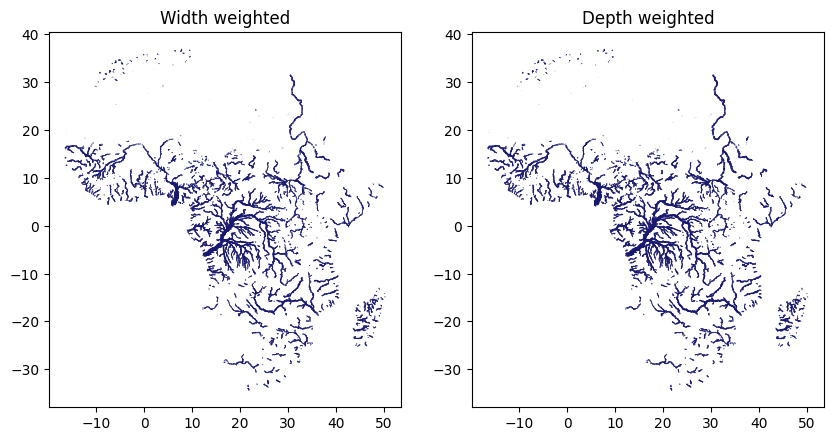

In [61]:
fig, axs = plt.subplots(figsize = (10, 5), ncols = 2)

rivers_neat.plot(ax = axs[0], color = 'midnightblue', linewidth = rivers_neat['LW_WIDTH'])
axs[0].set_title('Width weighted')
rivers_neat.plot(ax = axs[1], color = 'midnightblue', linewidth = rivers_neat['LW_DEPTH']) 
axs[1].set_title('Depth weighted')

In [70]:
def add_rivers(ax, color = 'midnightblue'):
    rivers_neat.plot(ax = ax, color = 'midnightblue', linewidth = rivers_neat['LW_WIDTH'], transform = ccrs.PlateCarree())
    return ax

<GeoAxes: title={'center': "PHILIPS' COMPARATIVE WALL ATLAS OF AFRICA"}>

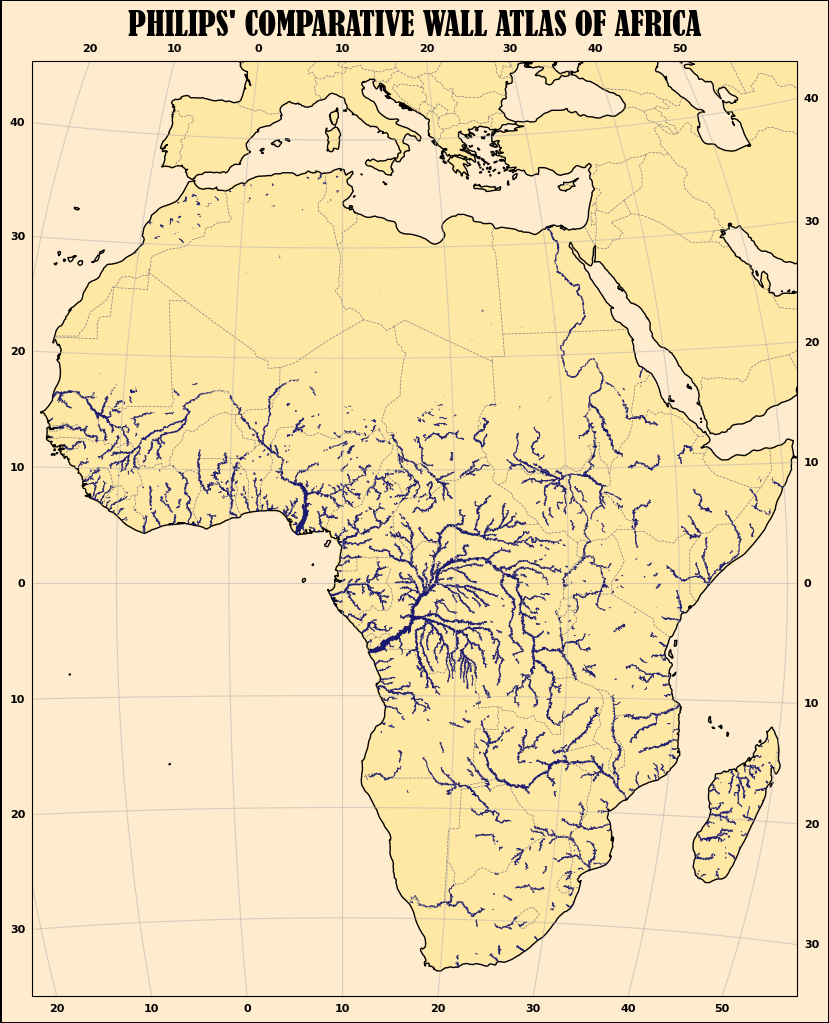

In [69]:
fig, ax = plot_template()
add_rivers(ax);

## Access ERA5

NExt step is to use `cdsapi` to access ERA5 data to calculate a climatology. 

Timeframe: 1981 - 2010. Area: 30E - 60W, 40S - 50N.

**Completed Steps:** 

- Request rainfall, pressure and wind variables over a designated area and timeframe.
- Wrangle data into a climatology.
- Save the variables as a local NetCDF. 

<!-- **ERA5 resolution:** 0.25 x 0.25

**'cf = 8' resolution:** 2.0 x 2.0

**'cf = 16' resolution:** 4.0 x 4.0 -->

Use `cdsapi` to retrieve 30 years of ERA5 data, request shown below:

```python
c.retrieve(
   'reanalysis-era5-single-levels-monthly-means',
   {
       'format': 'netcdf',
       'product_type': 'monthly_averaged_reanalysis',
       'variable': [
           '10m_u_component_of_wind', '10m_v_component_of_wind', 'land_sea_mask',
           'mean_sea_level_pressure', 'surface_pressure', 'total_precipitation',
       ],
       'year': [
           '1981', '1982', '1983',
           '1984', '1985', '1986',
           '1987', '1988', '1989',
           '1990', '1991', '1992',
           '1993', '1994', '1995',
           '1996', '1997', '1998',
           '1999', '2000', '2001',
           '2002', '2003', '2004',
           '2005', '2006', '2007',
           '2008', '2009', '2010',
       ],
       'month': [
           '01', '02', '03',
           '04', '11', '12',
       ],
       'time': '00:00',
       'area': [
           50, -30, -40,
           60,
       ],
   },
   'map_download.nc')
```

In [72]:
import xarray as xr

In [74]:
ds = xr.open_dataset('data/map_download.nc')
ds

<xarray.Dataset> Size: 563MB
Dimensions:    (longitude: 361, latitude: 361, time: 180)
Coordinates:
  * longitude  (longitude) float32 1kB -30.0 -29.75 -29.5 ... 59.5 59.75 60.0
  * latitude   (latitude) float32 1kB 50.0 49.75 49.5 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 1kB 1981-01-01 1981-02-01 ... 2010-12-01
Data variables:
    u10        (time, latitude, longitude) float32 94MB ...
    v10        (time, latitude, longitude) float32 94MB ...
    msl        (time, latitude, longitude) float32 94MB ...
    tp         (time, latitude, longitude) float32 94MB ...
    lsm        (time, latitude, longitude) float32 94MB ...
    sp         (time, latitude, longitude) float32 94MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-10-31 18:37:52 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

## Rainfall

**Preparation:**
- Define bins, colors and labels for rainfall legend.


**Need to:**
- [Find optimal dataset for precitation](https://twitter.com/apuffycloud/status/1481399487415345158).

In [75]:
rain_bins = [0, 5, 10, 20, 30, 40, 1000]
rain_cols = ['gold', 'cornsilk', 'paleturquoise', 'mediumturquoise', 'lightseagreen', 'midnightblue']
rain_labels = ['Under 5  ,,', '5 -10  ,,', '10-20  ,,', '20-30  ,,', '30-40  ,,', 'Over 40 inches', ' ']

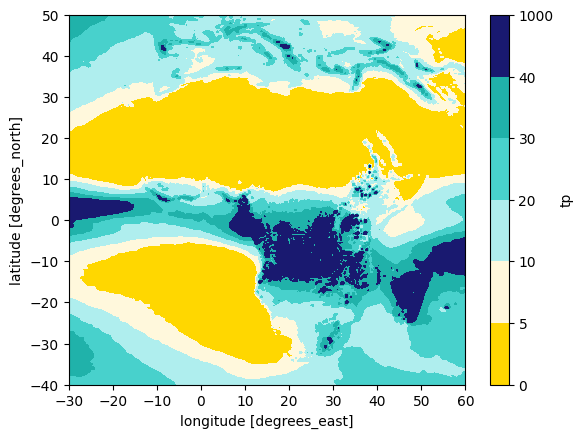

In [82]:
rain = ds.tp                           # Extract total precipitation
rain = rain * 39.37                    # Convert from metres to inches
rain = rain.sum(dim = 'time')          # Sum for 30 years (Nov to Apr)
#rain = rain #/ 30                     # Calculate annual average
rain.plot.contourf(levels = rain_bins, colors = rain_cols);

First look at the raw ERA5 data show that it is higher resolution than the data in the original map. 

In the original figure there are still features of approximately 1° scale picked up by the map.

To recreate the precipitation shown in the original map, we need to do the following:
- apply 2 dimensional smoothing (using `scipy`).
- apply land sea mask.
- add subtle grey contours between the bins.
- make custom colorbar.

In [85]:
import scipy.ndimage as ndimage

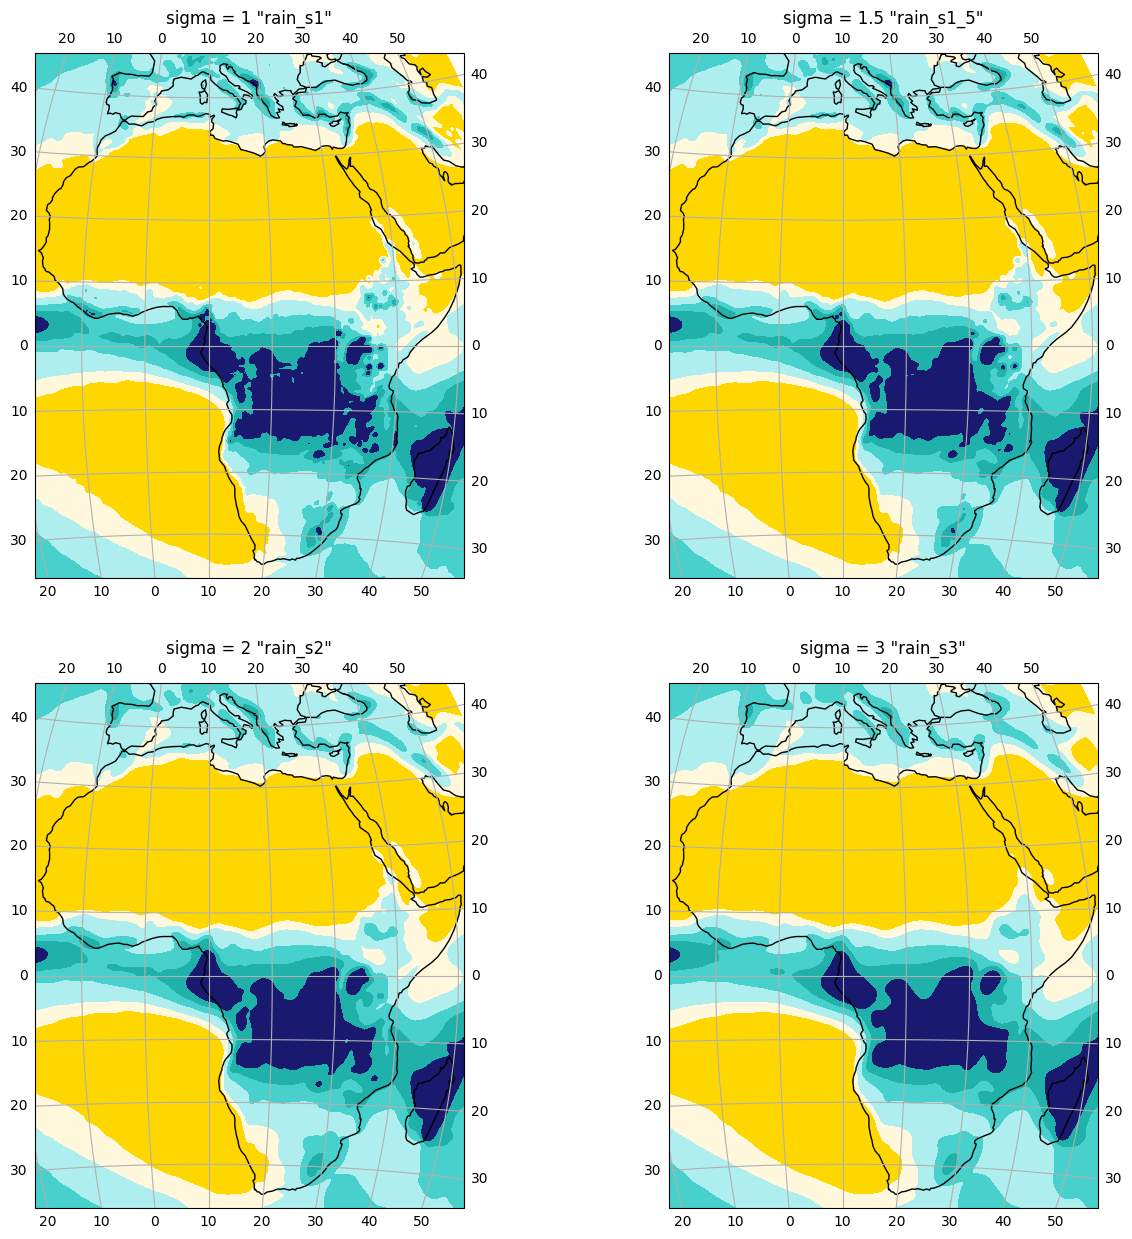

In [90]:
rain_s1 = ndimage.gaussian_filter(rain, sigma = 1, order = 0)        # Gaussian filter with sigma = 1
rain_s2 = ndimage.gaussian_filter(rain, sigma = 2, order = 0)        # Gaussian filter with sigma = 2
rain_s1_5 = ndimage.gaussian_filter(rain, sigma = 1.5, order = 0)    # Gaussian filter with sigma = 1.5
rain_s3 = ndimage.gaussian_filter(rain, sigma = 3, order = 0)        # Gaussian filter with sigma = 3

fig, axs = plt.subplots(figsize = (15, 15), ncols = 2, nrows=2,subplot_kw={'projection': proj4})

for i, ax in enumerate(fig.axes):
    ax.set_extent(extent)
    gl = ax.gridlines(draw_labels = True, x_inline = False, 
                  yformatter = lat_formatter, 
                  xformatter = lon_formatter)
    gl.xlocator = mticker.FixedLocator(xticks)
    gl.ylocator = mticker.FixedLocator(yticks)
    ax.coastlines(color = 'k', linewidth = 1)
    
axs[0,0].set_title('sigma = 1 "rain_s1"')
axs[0,0].contourf(rain.longitude, rain.latitude, rain_s1,
                levels = rain_bins, colors = rain_cols,
                transform = ccrs.PlateCarree())

axs[0,1].set_title('sigma = 1.5 "rain_s1_5"')
axs[0,1].contourf(rain.longitude, rain.latitude, rain_s1_5,
                levels = rain_bins, colors = rain_cols,
                transform = ccrs.PlateCarree());    

axs[1, 0].set_title('sigma = 2 "rain_s2"')
axs[1, 0].contourf(rain.longitude, rain.latitude, rain_s2, 
                    levels = rain_bins,
                    transform = ccrs.PlateCarree(),
                    colors = rain_cols)   

axs[1, 1].set_title('sigma = 3 "rain_s3"')
axs[1, 1].contourf(rain.longitude, rain.latitude, rain_s3, 
                    levels = rain_bins,
                    transform = ccrs.PlateCarree(),
                    colors = rain_cols);

Results of this comparison shows that using a filter with a sigma of 1.5 has the cloest resembalance to the original map, so that is what we will be using going forwards. 

Using the filter removes the coordinates so we need to make the final data into an `xarray` dataarray, before we apply a land-sea mask.

In [91]:
rain_s1_5 = xr.DataArray(rain_s1_5,                                      # Write filtered arrary to an Xarray DataArray
                         dims = ['latitude', 'longitude'],
                         coords = {'latitude': rain.latitude,
                                   'longitude': rain.longitude})

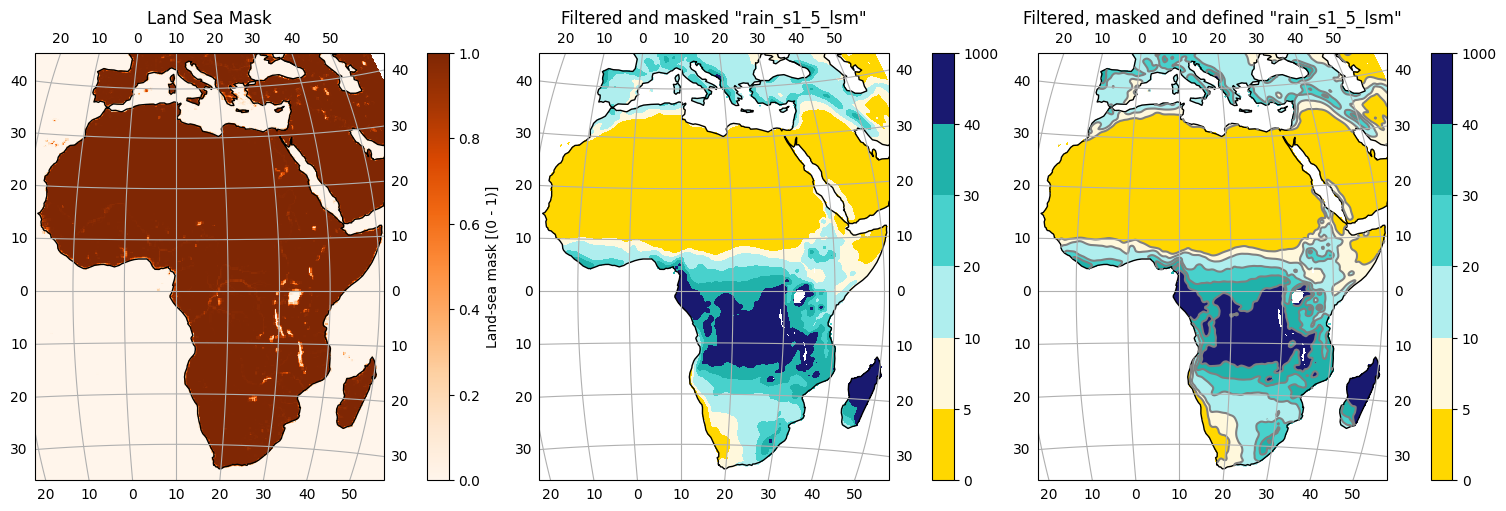

In [97]:
lsm = ds.lsm[0, :, :]                                                          # Write LSM DataArray
rain_s1_5_lsm = rain_s1_5.where(lsm > 0.25)                                    # Write a filtered DA cropped by LSM

fig, axs = plt.subplots(figsize = (15, 5), ncols = 3, layout = 'constrained', subplot_kw = {'projection': proj4})
for i, ax in enumerate(fig.axes):
    ax.set_extent(extent)
    gl = ax.gridlines(draw_labels = True, x_inline = False, 
                  yformatter = lat_formatter, 
                  xformatter = lon_formatter)
    gl.xlocator = mticker.FixedLocator(xticks)
    gl.ylocator = mticker.FixedLocator(yticks)
    ax.coastlines(color = 'k', linewidth = 1)

lsm.plot(ax = axs[0], cmap = 'Oranges', transform = ccrs.PlateCarree())
axs[0].set_title('Land Sea Mask')
rain_s1_5.where(lsm > 0.25).plot.contourf(ax = axs[1], levels = rain_bins, colors = rain_cols, transform = ccrs.PlateCarree())
axs[1].set_title('Filtered and masked "rain_s1_5_lsm"');
rain_s1_5.where(lsm > 0.25).plot.contourf(ax = axs[2], levels = rain_bins, colors = rain_cols, transform = ccrs.PlateCarree())
rain_s1_5_lsm.plot.contour(ax=axs[2],
                levels = rain_bins, colors = 'grey',
                transform = ccrs.PlateCarree())
axs[2].set_title('Filtered, masked and defined "rain_s1_5_lsm"');